In [1]:
!pip install xgboost

import numpy as np 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler, StandardScaler,RobustScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
import warnings



In [2]:
warnings.filterwarnings("ignore")


data Acquisition

In [4]:

df = pd.read_csv(r"C:\Users\laxmi\Downloads\archive (3)\creditcard.csv")

In [5]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [6]:
df.shape

(284807, 31)

In [7]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
df.info

<bound method DataFrame.info of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  

2-data cleaning

In [10]:
#handling missing data
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
print(df.duplicated().sum())


1081


In [12]:
df = df.drop_duplicates()  # To modify df
print(df)  # To print the modified DataFrame


            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.01830

In [13]:
df.shape

(283726, 31)

In [14]:
print(df.duplicated().sum())
#after removng duplicates no there is no duplicates in our data

0


3-EDA

In [16]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


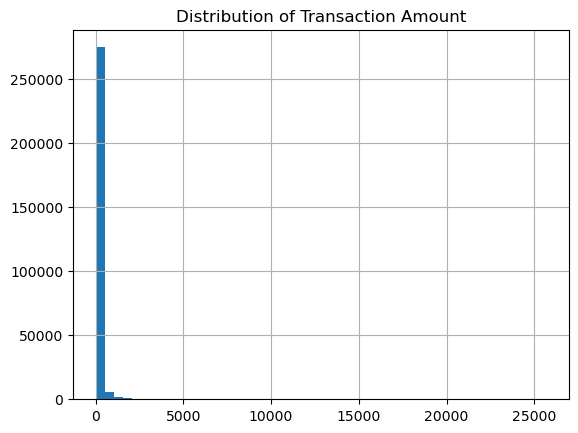

Text(0.5, 1.0, 'Distribution of Transaction Time')

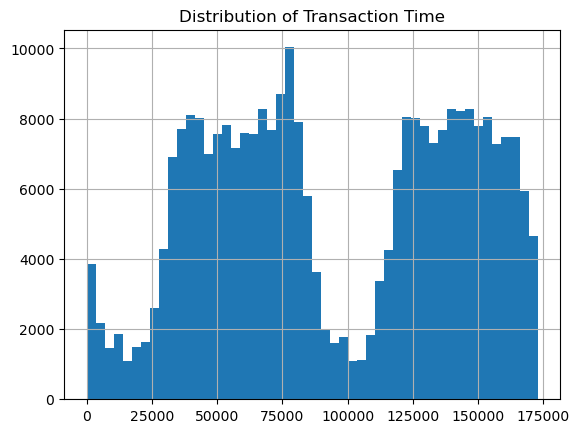

In [17]:
df['Amount'].hist(bins=50)
plt.title('Distribution of Transaction Amount')
plt.show()

df['Time'].hist(bins=50)
plt.title('Distribution of Transaction Time')


check the distribution of target varibale (class)

Text(0.5, 1.0, 'Class Distribution (Fraud vs Non-Fraud)')

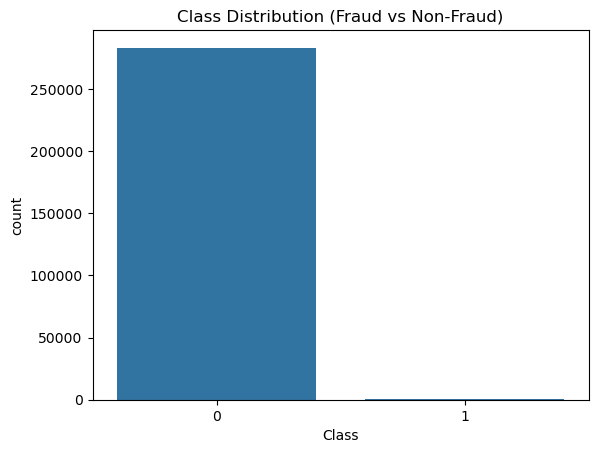

In [19]:
sns.countplot(x='Class', data=df)
plt.title("Class Distribution (Fraud vs Non-Fraud)")

Detect outliers in Amount &Time

Text(0.5, 1.0, 'Box Plot for Transaction Time')

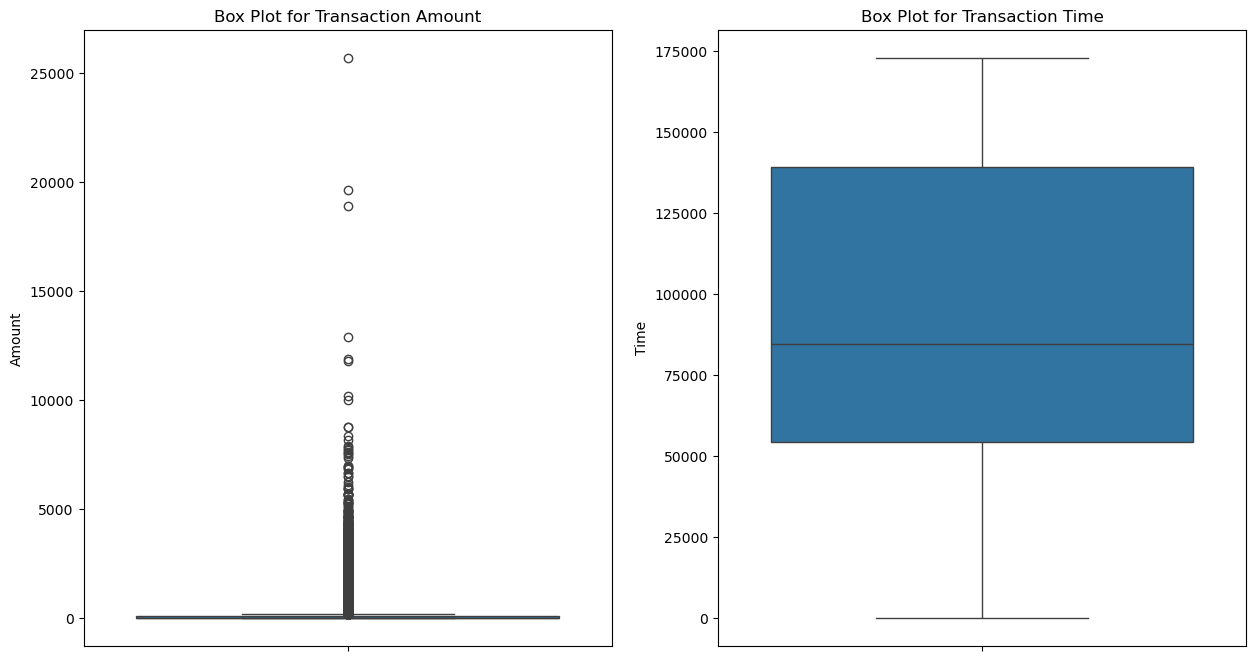

In [21]:
# Create box plots for 'Amount' and 'Time'
fig, ax = plt.subplots(1, 2, figsize=(15, 8))
sns.boxplot(y='Amount', data=df, ax=ax[0])
ax[0].set_title('Box Plot for Transaction Amount')
sns.boxplot(y='Time', data=df, ax=ax[1])
ax[1].set_title('Box Plot for Transaction Time')

time distribution between fraudulent and non-fraudulent transactions

Text(0.5, 1.0, 'Transaction Time by Class')

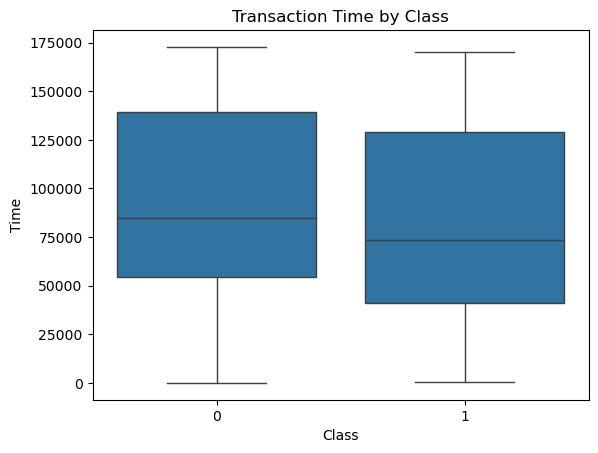

In [23]:
sns.boxplot(x='Class', y='Time', data=df)
plt.title("Transaction Time by Class")


distribuation of  all columns

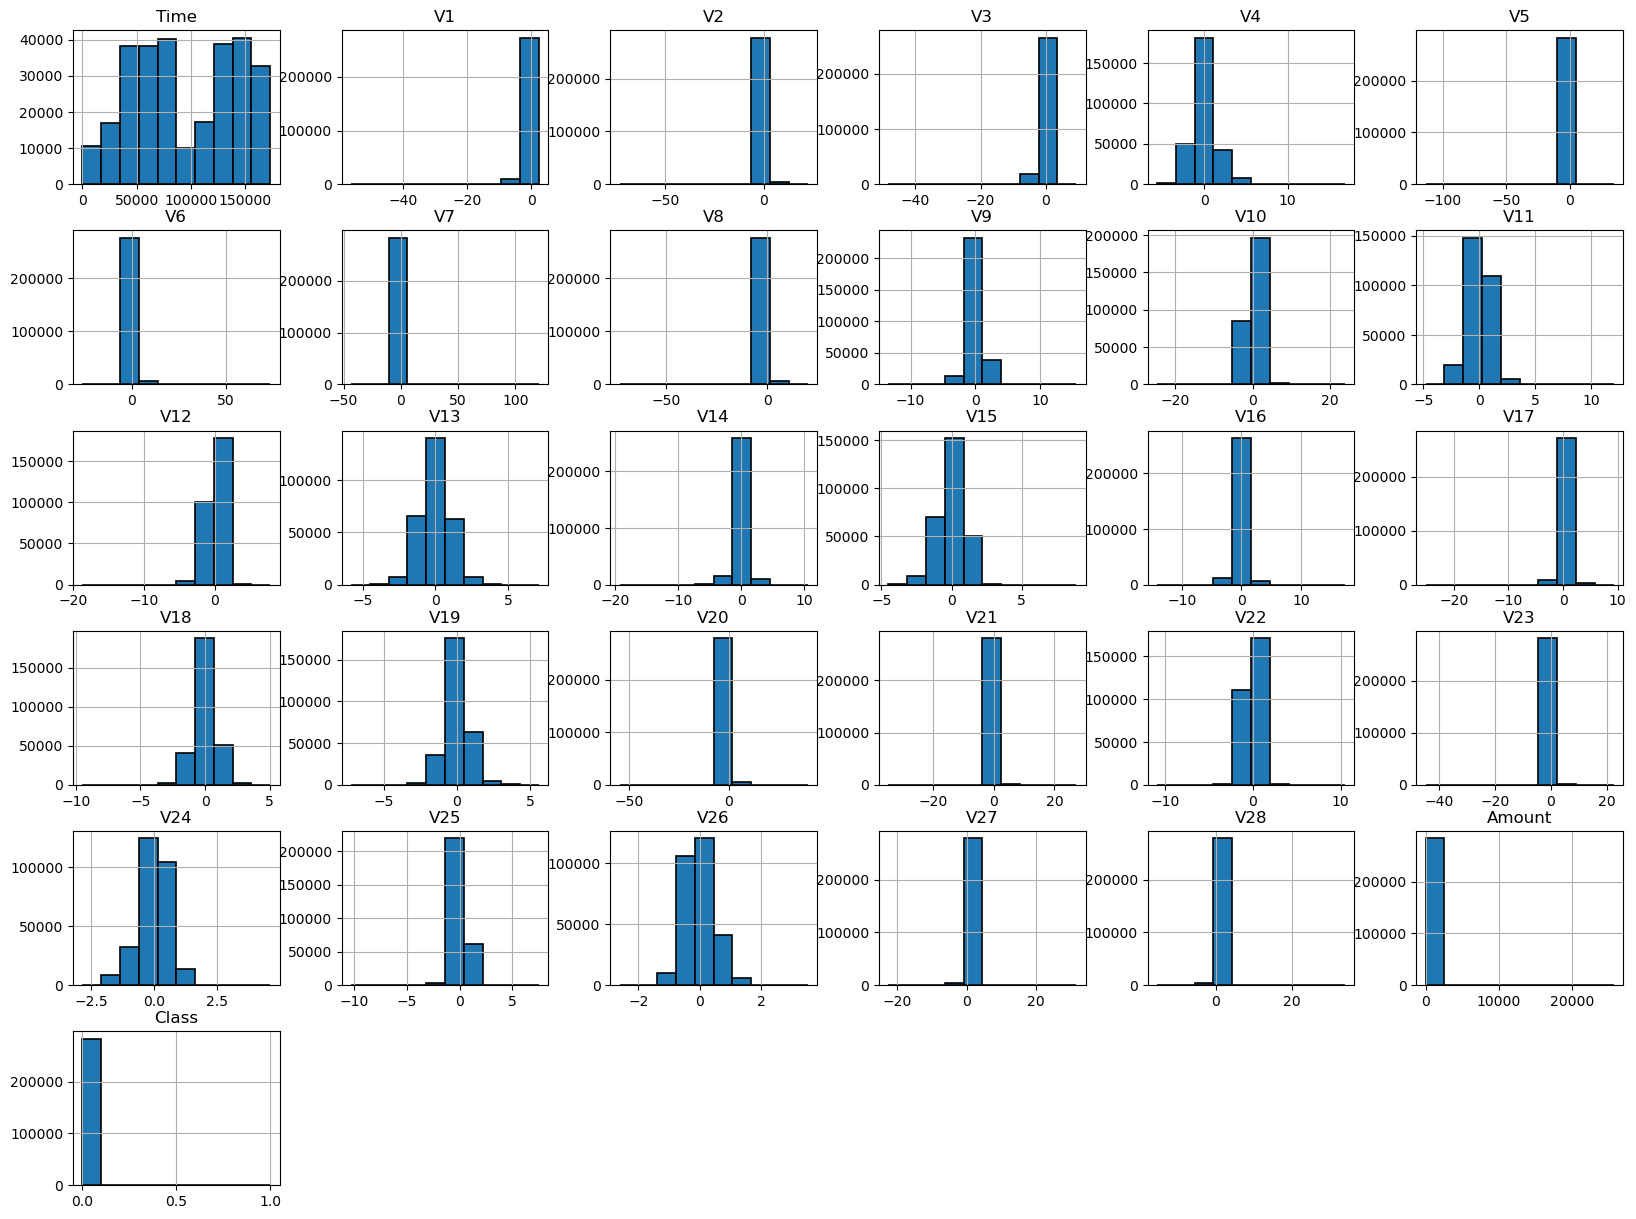

In [25]:
df.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(20,15)

How the transaction amount differs between fraudulent and non-fraudulent transactions.

Text(0.5, 1.0, 'Amount Distributions: Fraud vs Non-Fraud')

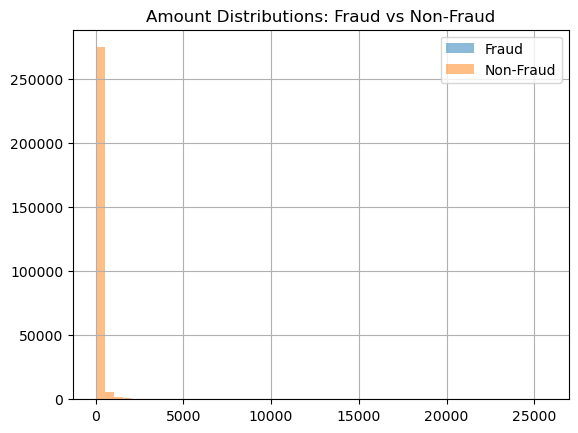

In [27]:
fraud =df[df['Class'] == 1]
non_fraud =df[df['Class'] == 0]

fraud['Amount'].hist(alpha=0.5, label='Fraud', bins=50)
non_fraud['Amount'].hist(alpha=0.5, label='Non-Fraud', bins=50)
plt.legend()
plt.title('Amount Distributions: Fraud vs Non-Fraud')


check if fraud transactions happen more frequently at specific times.

Text(0.5, 1.0, 'Time Distributions: Fraud vs Non-Fraud')

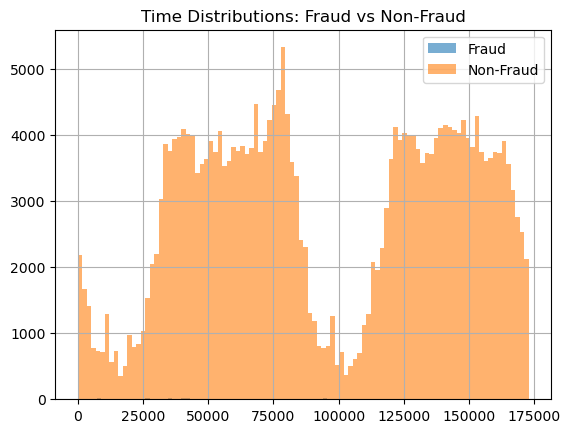

In [29]:
fraud['Time'].hist(alpha=0.6, label='Fraud', bins=100)
non_fraud['Time'].hist(alpha=0.6, label='Non-Fraud', bins=100)
plt.legend()
plt.title('Time Distributions: Fraud vs Non-Fraud')

how pairs of PCA features behave

Text(0.5, 1.0, 'Scatter plot between V1 and V2 (colored by Class)')

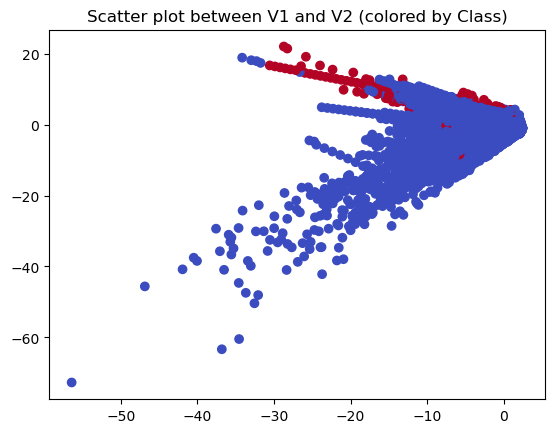

In [31]:
plt.scatter(df['V1'], df['V2'], c=df['Class'], cmap='coolwarm')
plt.title('Scatter plot between V1 and V2 (colored by Class)')

Text(0.5, 1.0, 'Correlation Matrix of Features')

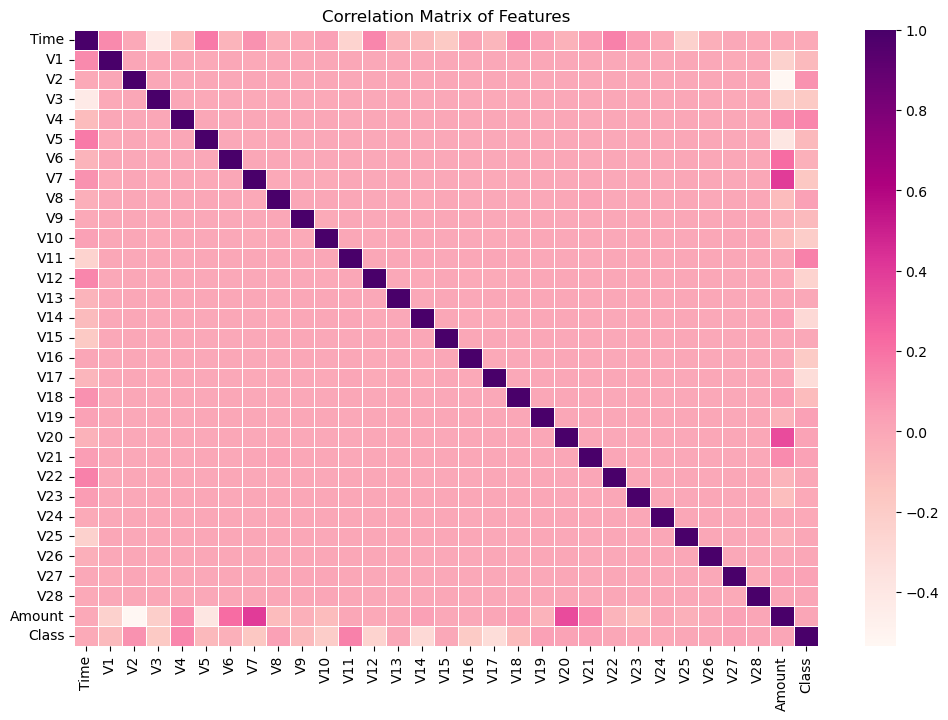

In [32]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='RdPu', linewidths=0.5)
plt.title("Correlation Matrix of Features")


Multivariate Analysis

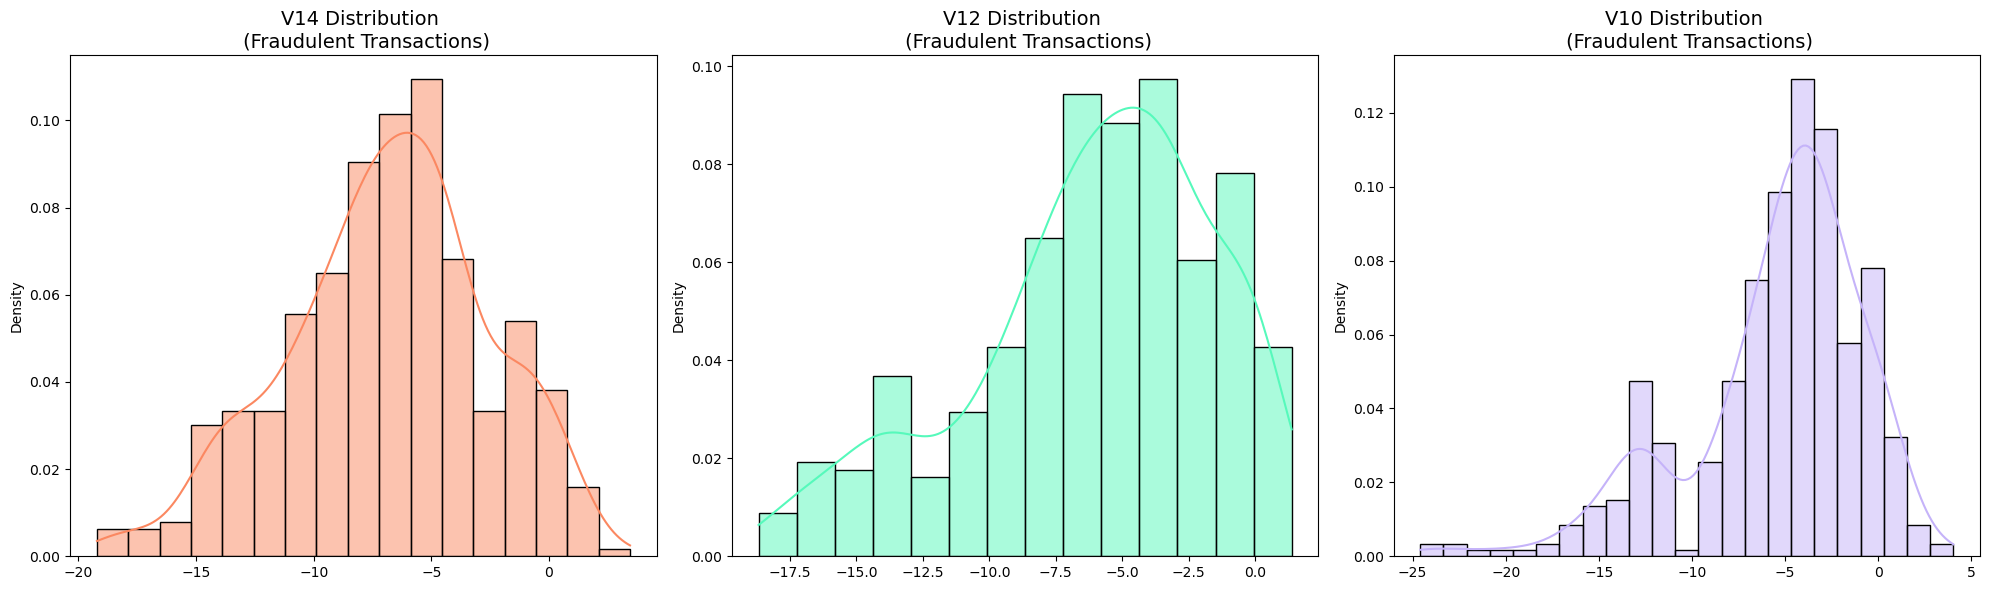

In [34]:
# Set up the subplots
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

v14_fraud_dist = df['V14'].loc[df['Class'] == 1].values  
sns.histplot(v14_fraud_dist, ax=ax1, kde=True, color='#FB8861', stat='density')
ax1.set_title('V14 Distribution \n (Fraudulent Transactions)', fontsize=14)

v12_fraud_dist = df['V12'].loc[df['Class'] == 1].values  
sns.histplot(v12_fraud_dist, ax=ax2, kde=True, color='#56F9BB', stat='density')
ax2.set_title('V12 Distribution \n (Fraudulent Transactions)', fontsize=14)

v10_fraud_dist = df['V10'].loc[df['Class'] == 1].values 
sns.histplot(v10_fraud_dist, ax=ax3, kde=True, color='#C5B3F9', stat='density')
ax3.set_title('V10 Distribution \n (Fraudulent Transactions)', fontsize=14)
plt.tight_layout()


Visualize the relationships between three PCA features and the target

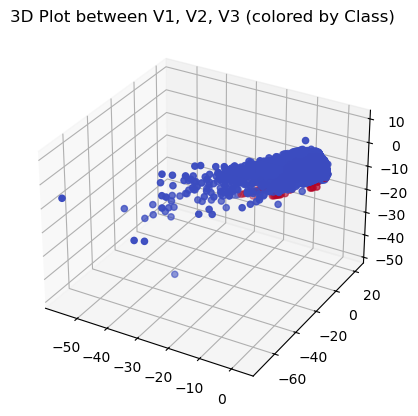

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['V1'], df['V2'], df['V3'], c=df['Class'], cmap='coolwarm')
plt.title('3D Plot between V1, V2, V3 (colored by Class)')
plt.show()


In [37]:
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_clean = df[(df['Amount'] >= lower_bound) & (df['Amount'] <= upper_bound)]


Text(0.5, 1.0, 'Box Plot for Transaction Time')

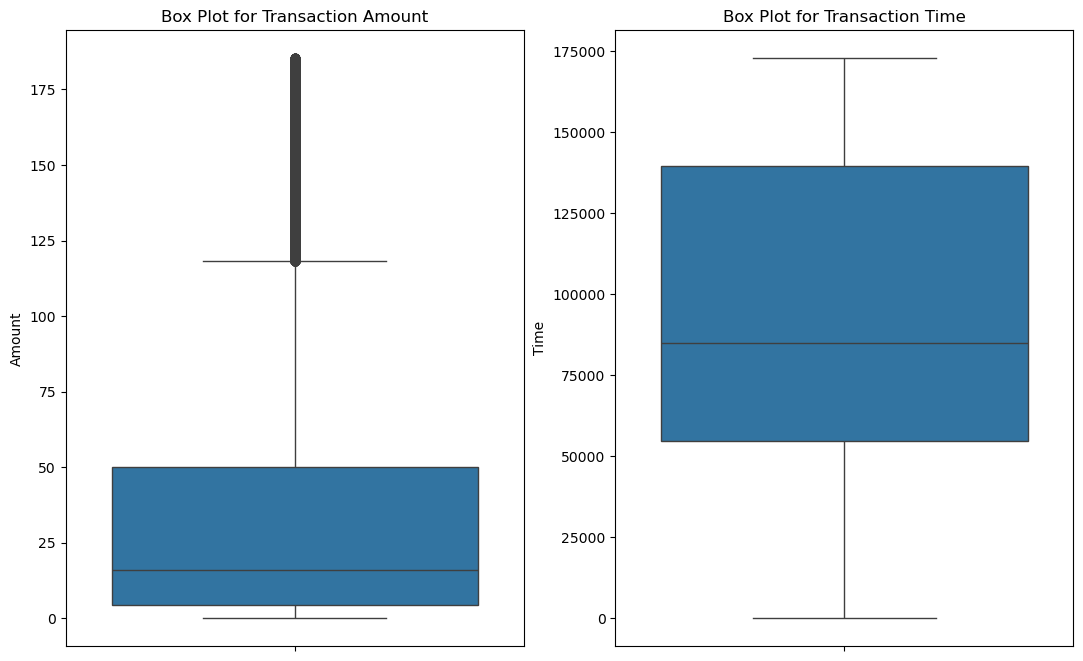

In [38]:
# Create box plots for 'Amount' and 'Time'
fig, ax = plt.subplots(1, 2, figsize=(13, 8))
sns.boxplot(y='Amount', data=df_clean, ax=ax[0])
ax[0].set_title('Box Plot for Transaction Amount')
sns.boxplot(y='Time', data=df_clean, ax=ax[1])
ax[1].set_title('Box Plot for Transaction Time')

📌NOTE!!!!
After i remove outliers from Amount Feature i realize that is not correct !
>> fraudulent transactions are inherently rare and often appear as outliers in the data (unusually large or small transaction amounts), Removing these outliers could result in losing critical data points that are important for identifying fraud ,as ths dataset is highly imbalanced keeping outliers might help the model capture this minority class better.
>> i also think Removing Outliers from Amount in Non-Fraudulent Transactions: but this will make a big trouble! because this will lead to (Data Leakage) because I'LL remove non-fraudulent outliers based on information that may not be available in real-world scenarios so the best Senario is keepint these Outliers and i will work on data not df_clean.

6-Data Transformation

1-Log Transformation

In [42]:
df = df.copy()
df['Amount'] = np.log(df['Amount'] + 1)


In [43]:
df.shape


(283726, 31)

Normalization Using MinMaxScaler

In [45]:
# Select the features you want to normalize
features = ['V10','V11', 'V12', 'V13', 'V14','V16','V17']
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])


7-Feature Engineering

Doing Feature Selection with Random Forest and Plotting Feature Importance

In [48]:
# Select the features you want to normalize

scaler = StandardScaler()
df[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']] = scaler.fit_transform(df[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']])


In [49]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

8-Handling Imbalanced Data

i will apply >> Over- and Under-sampling: This involves both reducing the majority class and increasing the minority class, creating a more balanced dataset without oversampling too much or undersampling too aggressively.

In [52]:
X = df.drop('Class', axis=1) 
Y = df['Class'] 


In [53]:
X.shape


(283726, 30)

In [54]:
Y.shape

(283726,)

In [55]:
print(df[df['Class'] == 0]['Class'].value_counts())
print(df[df['Class'] == 1]['Class'].value_counts())


Class
0    283253
Name: count, dtype: int64
Class
1    473
Name: count, dtype: int64


In [56]:
    X = df.drop('Class', axis=1)  
y= df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
smote = SMOTE(sampling_strategy=0.6, random_state=42)


In [57]:
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
print("Before resampling:", Counter(y_train))
print("After resampling:", Counter(y_resampled))


Before resampling: Counter({0: 198269, 1: 339})
After resampling: Counter({0: 198269, 1: 118961})


In [58]:
df = pd.DataFrame(X_resampled, columns=X.columns) #Combine the resampled X and y into a new DataFrame
df['Class'] = y_resampled 


In [59]:
df.shape

(317230, 31)

Text(0.5, 1.0, 'Class Distribution (Fraud vs Non-Fraud)')

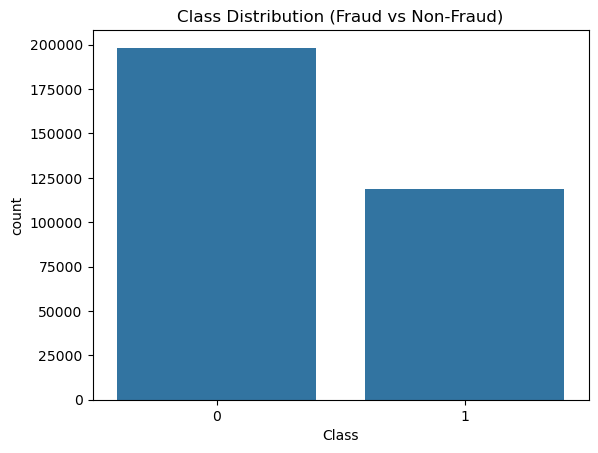

In [60]:
sns.countplot(x='Class', data=df)
plt.title("Class Distribution (Fraud vs Non-Fraud)")


In [61]:
print(df.duplicated().sum()) #note that No null values will not appear in the newly generated rows,
                               #as the like SMOTE create realistic, filled-in values for all features.


0


In [62]:
print(df[df['Class'] == 0]['Class'].value_counts())
print(df[df['Class'] == 1]['Class'].value_counts())


Class
0    198269
Name: count, dtype: int64
Class
1    118961
Name: count, dtype: int64


check data distribution after all changes i do in it:

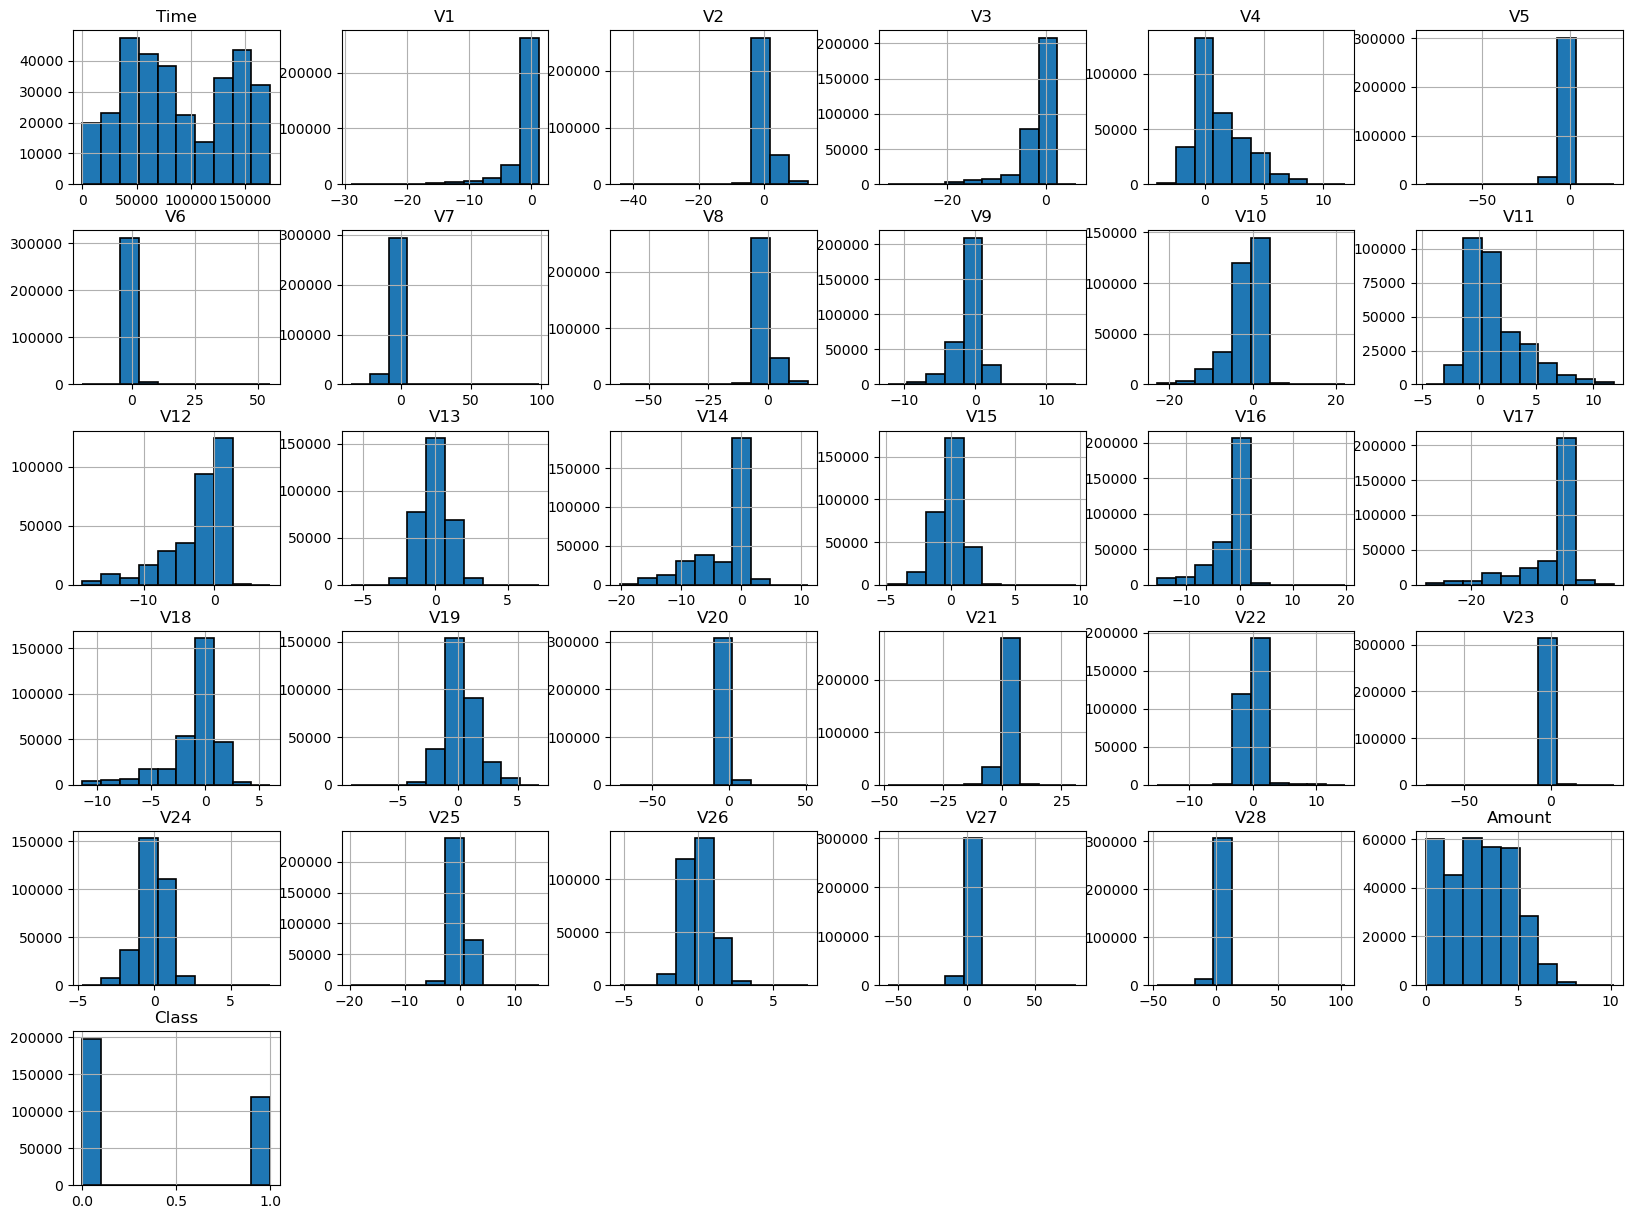

In [64]:
df.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(20,15)


splitting 

In [66]:
X = df.drop('Class', axis=1)  
y = df['Class'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)




model selection 

In [68]:
classifiers = {
    "LogisticRegression": LogisticRegression(
        penalty='l2',           # L2 regularization to prevent overfitting
        C=2.0,                  # Regularization strength (lower value = stronger regularization)
        solver='liblinear',    
        max_iter=1000           
    ),
    
    "KNearest": KNeighborsClassifier(
         n_neighbors=10,                    
    ),
    
    "XGB Classifier": XGBClassifier(
        max_depth=3,            # Limits the depth of the tree to reduce overfitting
        learning_rate=1,     
        n_estimators=9,      
        subsample=0.8,         
        colsample_bytree=0.8,   
        reg_lambda=1,           # L2 regularization term to prevent overfitting
        reg_alpha=0.2           # L1 regularization term
    ),
    
    "DecisionTreeClassifier": DecisionTreeClassifier(
        max_depth=150,            # Limit depth of the tree to prevent overfitting
        min_samples_split=25,  
        min_samples_leaf=15,     
        max_features='sqrt',   
        ccp_alpha=0.01          
    )
}


model traning

📌Note!!!¶
The MODEL OVERFITTED !
After i train my model the XGB Classifier and DecisionTreeClassifier caused overfit with accuracy 100% , i made sure of that by test it on unseen data and it generalize very bad! i also compare between Training data performance and Testing data performance and find Testing less than T raining .
HOW DID I SOLVE THIS PROBLEM?
Regularization
Early stopping
tuning certain parameters


In [71]:

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"Results for {name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred, pos_label=1):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred, pos_label=1):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred, pos_label=1):.4f}\n")

Results for LogisticRegression:
Accuracy: 0.9333
Precision: 0.9969
Recall: 0.8241
F1 Score: 0.9023

Results for KNearest:
Accuracy: 0.9445
Precision: 0.9767
Recall: 0.8724
F1 Score: 0.9216

Results for XGB Classifier:
Accuracy: 0.9848
Precision: 0.9872
Recall: 0.9719
F1 Score: 0.9795

Results for DecisionTreeClassifier:
Accuracy: 0.9283
Precision: 0.9068
Recall: 0.9007
F1 Score: 0.9038



In [72]:
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    # Training data performance
    print(f"Training Results for {name}:")
    print(f"Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
    print(f"Precision: {precision_score(y_train, y_train_pred, pos_label=1):.4f}")
    print(f"Recall: {recall_score(y_train, y_train_pred, pos_label=1):.4f}")
    print(f"F1 Score: {f1_score(y_train, y_train_pred, pos_label=1):.4f}\n")
    
    # Testing data performance
    print(f"Testing Results for {name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_test_pred, pos_label=1):.4f}")
    print(f"Recall: {recall_score(y_test, y_test_pred, pos_label=1):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_test_pred, pos_label=1):.4f}\n")

Training Results for LogisticRegression:
Accuracy: 0.9339
Precision: 0.9971
Recall: 0.8262
F1 Score: 0.9036

Testing Results for LogisticRegression:
Accuracy: 0.9333
Precision: 0.9969
Recall: 0.8241
F1 Score: 0.9023

Training Results for KNearest:
Accuracy: 0.9548
Precision: 0.9849
Recall: 0.8933
F1 Score: 0.9368

Testing Results for KNearest:
Accuracy: 0.9445
Precision: 0.9767
Recall: 0.8724
F1 Score: 0.9216

Training Results for XGB Classifier:
Accuracy: 0.9851
Precision: 0.9864
Recall: 0.9738
F1 Score: 0.9800

Testing Results for XGB Classifier:
Accuracy: 0.9848
Precision: 0.9872
Recall: 0.9719
F1 Score: 0.9795

Training Results for DecisionTreeClassifier:
Accuracy: 0.9503
Precision: 0.9613
Recall: 0.9039
F1 Score: 0.9318

Testing Results for DecisionTreeClassifier:
Accuracy: 0.9507
Precision: 0.9606
Recall: 0.9052
F1 Score: 0.9321



Final Model and Deployment

Model Evaluation Metrics on Test Data:
Accuracy: 0.9848
Precision: 0.9872
Recall: 0.9719
F1 Score: 0.9795
Confusion Matrix:
 [[59128   449]
 [  999 34593]]


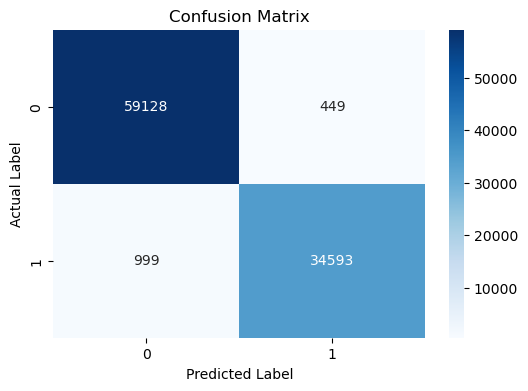

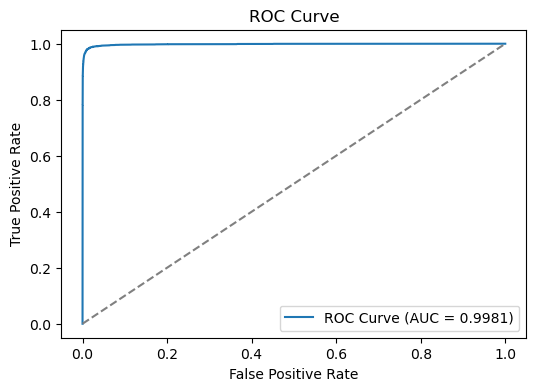

In [74]:
# Predictions using the best model
y_pred = classifiers['XGB Classifier'].predict(X_test)

# Evaluate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Model Evaluation Metrics on Test Data:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# ROC-AUC Curve
y_test_proba = classifiers['XGB Classifier'].predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_test_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.legend()
plt.show()


In [124]:
import pickle
with open('Final_Credit_Card_Fraud_Detection_Model.pkl', 'wb') as file:
    pickle.dump(classifiers['XGB Classifier'], file)


In [126]:
with open('Final_Credit_Card_Fraud_Detection_Model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
